## 모듈, 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('jeju_final_data_2.csv', encoding='ANSI')
data.head()

,index,Day,Holiday,Typhoon,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,...,Getoff_6.9,Getoff_9.12,Geton_total,Getoff_total,Commuter_count,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18.20
0,0,1,0,0,4270000,0.362711,시외,344,제주썬호텔,33.48990,...,0,0,16,0,8,15,1,0.0,0.0,0
1,1,1,0,0,29830000,0.183871,시내,96,제주민속오일장,33.49376,...,0,0,2,0,68,2,0,2.0,0.0,2
2,2,1,0,0,29830000,0.183871,시내,555,월평마을,33.46976,...,0,0,2,0,24,1,1,0.0,0.0,0
3,3,1,0,0,29830000,0.183871,시내,321,제주도청신제주로터리,33.49110,...,1,2,3,3,189,1,2,2.0,1.0,1
4,4,1,0,0,29830000,0.183871,시내,345,수협제주도지회,33.48987,...,0,0,4,0,17,3,1,0.0,0.0,0


In [3]:
data.tail()

,index,Day,Holiday,Typhoon,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,...,Getoff_6.9,Getoff_9.12,Geton_total,Getoff_total,Commuter_count,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18.20
286701,415417,30,1,0,27290000,0.082509,시내,2201,하천리중동,33.34723,...,0,0,5,0,11,1,4,0.0,0.0,0
286702,415418,30,1,0,31890000,0.186757,시내,358,한라병원,33.48963,...,1,2,4,3,357,3,1,2.0,1.0,8
286703,415419,30,1,0,31890000,0.186757,시외,391,삼무공원사거리,33.48990,...,0,2,2,2,125,1,1,2.0,0.0,4
286704,415421,30,1,0,23290000,0.172075,시내,292,천수동,33.50934,...,2,7,28,9,243,21,7,5.0,4.0,7
286705,415422,30,1,0,24200000,0.082203,시내,122,인다마을,33.47064,...,0,0,8,0,222,7,1,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286706 entries, 0 to 286705
Data columns (total 28 columns):
index                  286706 non-null int64
Day                    286706 non-null int64
Holiday                286706 non-null int64
Typhoon                286706 non-null int64
Route_id               286706 non-null int64
Route_score            286706 non-null float64
In_Out                 286706 non-null object
Station_code           286706 non-null int64
Station_name           286706 non-null object
Latitude               286706 non-null float64
Longitude              286706 non-null float64
Transfer               286706 non-null int64
Airport                286706 non-null int64
Terminal               286706 non-null int64
School                 286706 non-null int64
Bus_interval           286706 non-null int64
Geton_6.9              286706 non-null int64
Geton_9.12             286706 non-null int64
Getoff_6.9             286706 non-null int64
Getoff_9.12            286

In [5]:
df1 = data.copy()

In [6]:
holiday = list(np.where(df1['Holiday'] ==1, 0, 1))
df1['Holiday'] = holiday

## 변수 상관계수

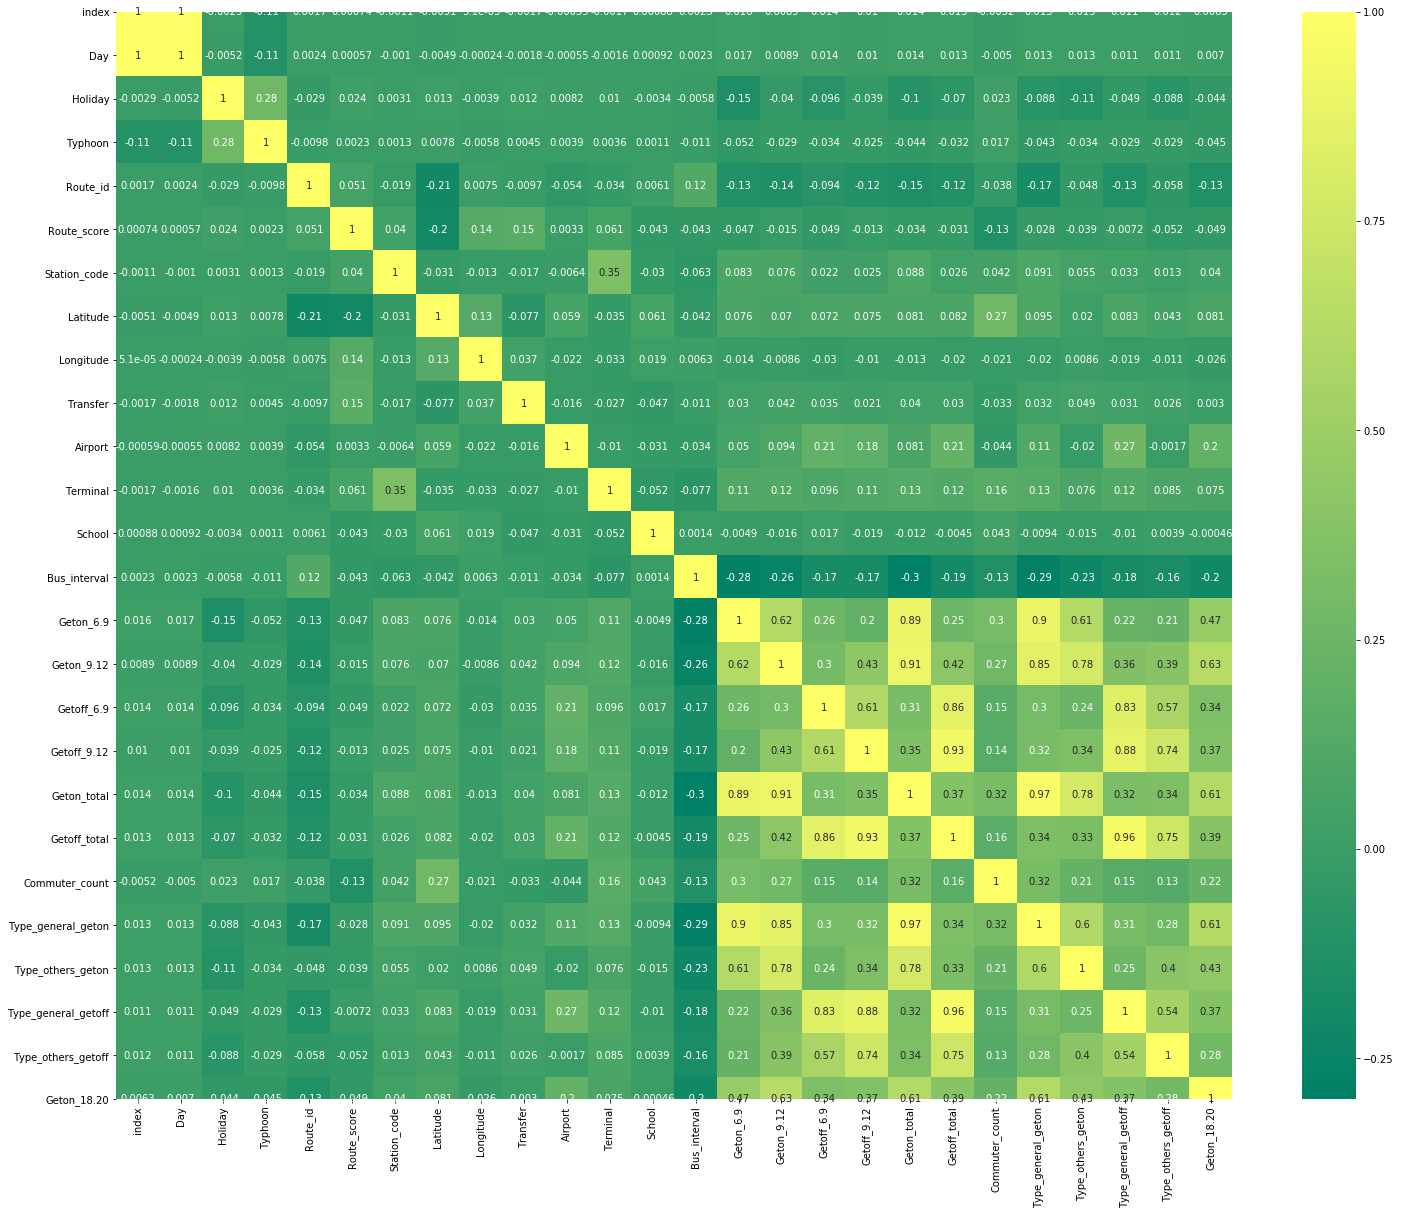

In [101]:
plt.figure(figsize=(25,20))
sns.heatmap(df1.corr(), annot=True, cmap='summer')
plt.show()

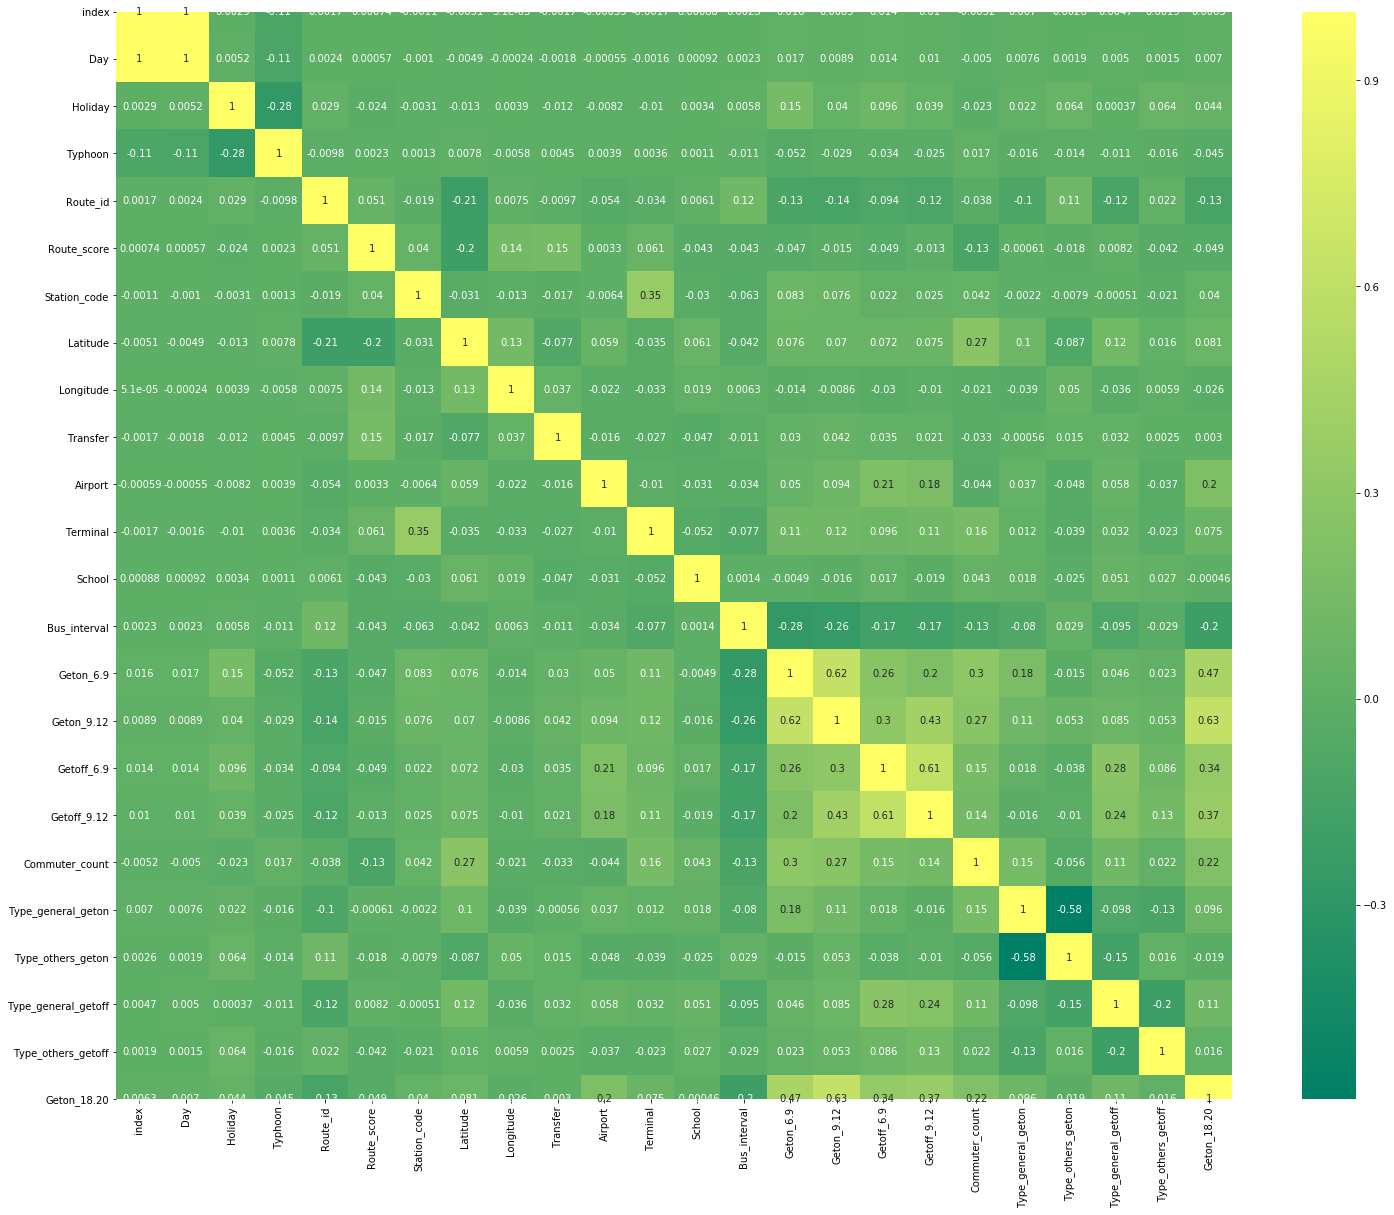

In [102]:
# min-max scaling 을 진행한 데이터
minmax_data = pd.read_csv('final_minmax.csv', encoding='ANSI')
plt.figure(figsize=(25,20))
sns.heatmap(minmax_data.corr(), annot=True, cmap='summer')
plt.show()

## 반응변수와 설명변수 관계

In [42]:
df1['Geton_18.20'].describe()

count    286706.000000
mean          1.744069
std           5.592080
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         272.000000
Name: Geton_18.20, dtype: float64

In [9]:
df1['Geton_18.20'].value_counts(normalize=True)

0      0.611933
1      0.139519
2      0.076950
3      0.045078
4      0.028737
         ...   
146    0.000003
149    0.000003
155    0.000003
157    0.000003
245    0.000003
Name: Geton_18.20, Length: 170, dtype: float64

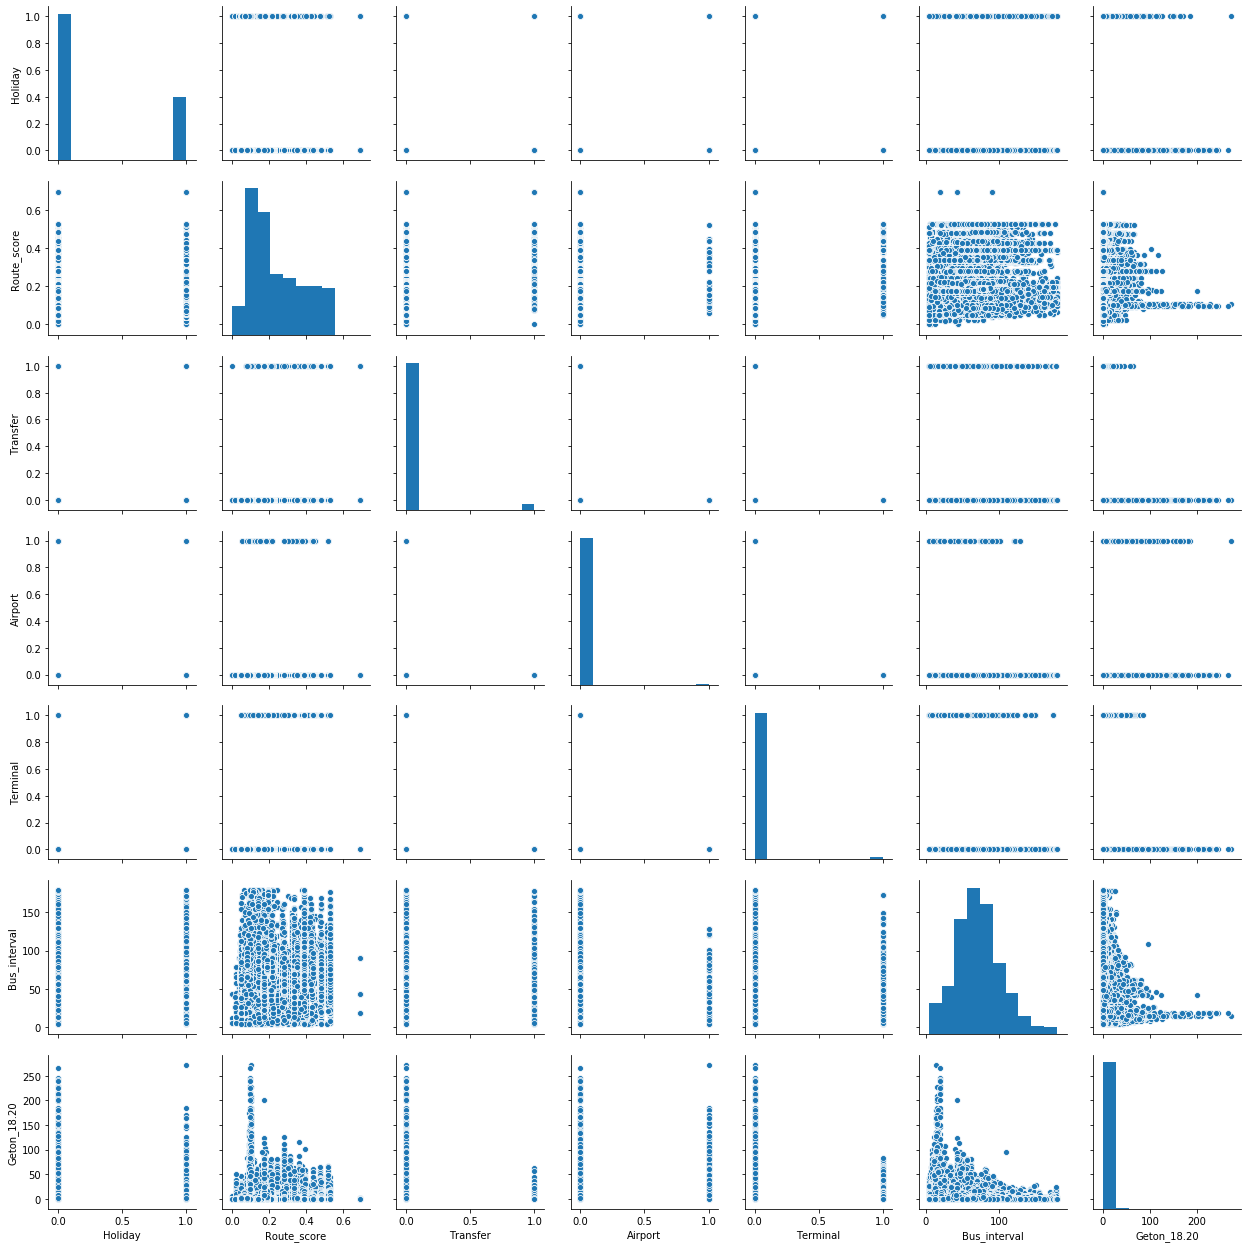

In [7]:
sns.pairplot(df1,
             x_vars=['Holiday','Route_score','Transfer','Airport','Terminal','Bus_interval','Geton_18.20'],
             y_vars=['Holiday','Route_score','Transfer','Airport','Terminal','Bus_interval','Geton_18.20'])

### 반응변수와 정류장 코드 관계

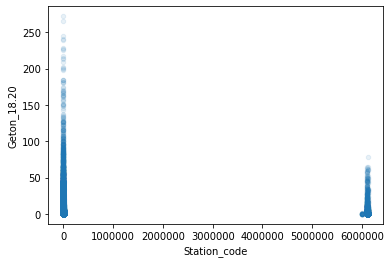

In [10]:
df1.plot.scatter(x='Station_code', y='Geton_18.20', alpha=0.1)

station_code가 양쪽으로 분할되니까 더 살펴보자.

In [14]:
df_stacode_big = df1[df1['Station_code']>3000000]

In [15]:
len(df_stacode_big['Station_code'])

1942

In [17]:
df_stacode_small = df1[df1['Station_code']<3000000]

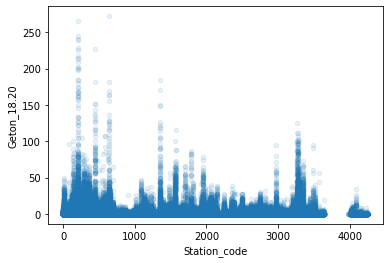

In [18]:
df_stacode_small.plot.scatter(x='Station_code', y='Geton_18.20', alpha=0.1)

반응변수가 0, 1인 데이터가 75%를 차지하므로 나머지 25%만 따로 살펴보기

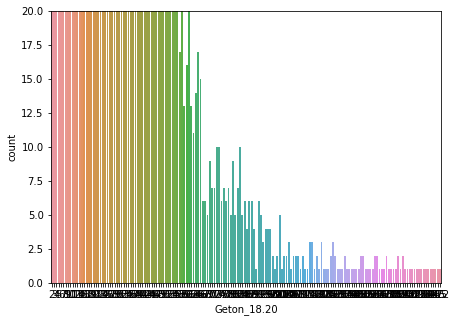

In [21]:
df_y25 = df1[df1['Geton_18.20']>1]

plt.figure(figsize=(7,5))
sns.countplot(x = 'Geton_18.20', data=df_y25)
plt.ylim(0, 20)
plt.show()

반응변수 값의 범위가 너무 크니까 로그변환이나 루트변환을 해보자

### 반응변수 스케일 변환

In [43]:
import math
from scipy.stats import boxcox
from sklearn import preprocessing

In [44]:
# 반응변수 스케일 변환
df1['y_boxcox'] = preprocessing.scale(boxcox(df1['Geton_18.20']+1)[0])
df1['y_scale'] = preprocessing.scale(df1['Geton_18.20'])
df1['y_robust_scale'] = preprocessing.robust_scale(df1['Geton_18.20'])
df1['y_minmax_scale'] = preprocessing.MinMaxScaler(df1['Geton_18.20'])
df1['y_log'] = preprocessing.scale(np.log(df1['Geton_18.20']+1))
df1['y_sqrt'] = preprocessing.scale(np.sqrt(df1['Geton_18.20']+1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed93bbc6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed93bbcdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed93bbc2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed93bc44a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed93bc47f0>],
 'means': []}

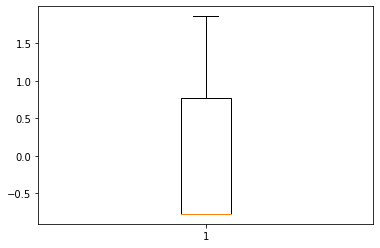

In [46]:
boxplot(df1['y_boxcox'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed961f4a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed961f4ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed961f4668>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed961fe828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed961feb70>],
 'means': []}

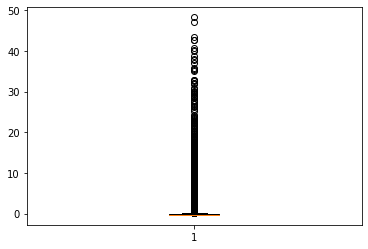

In [47]:
boxplot(df1['y_scale'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed96259550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed96259c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed96259160>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed96259ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed96262630>],
 'means': []}

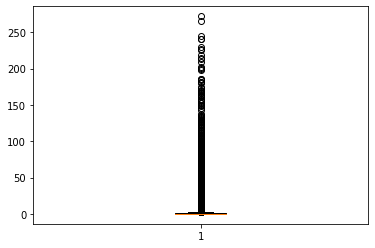

In [48]:
boxplot(df1['y_robust_scale'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed8dafb6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed8dafbcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed8dafbac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed8dafb898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed8daf12b0>],
 'means': []}

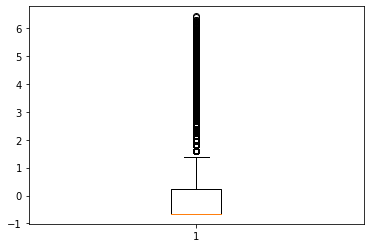

In [51]:
boxplot(df1['y_log'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed908b5cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed908c1f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed908b5be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed908c1080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed908c10f0>],
 'means': []}

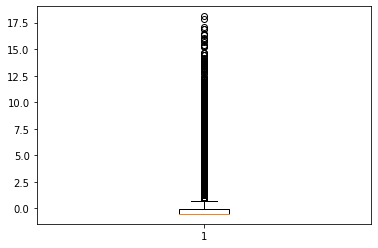

In [52]:
boxplot(df1['y_sqrt'])

로그변환을 한 뒤에는 그나마 박스가 그려진다

In [27]:
df1['y_root'] = preprocessing.scale(np.sqrt(df1['Geton_18.20']))
df1['y_root'].describe()

count    2.867060e+05
mean    -2.760607e-14
std      1.000002e+00
min     -6.279124e-01
25%     -6.279124e-01
50%     -6.279124e-01
75%      2.662003e-01
max      1.411817e+01
Name: y_root, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed8db76dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed8db7d780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed8db76c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed8db7de10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed8db7def0>],
 'means': []}

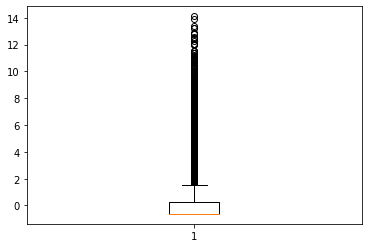

In [28]:
boxplot(df1['y_root'])

## 노선 점수에 따른 승하차인원 차이

In [54]:
route_score_grp = list(np.where(df1['Route_score'] < 0.2506262, 'short', 'long'))
df1['Route_score_grp'] = route_score_grp

In [56]:
route_score_y_mean = list(df1.groupby('Route_score_grp')['Geton_18.20'].mean())
route_score_y_median = list(df1.groupby('Route_score_grp')['Geton_18.20'].median())

In [58]:
df1['Route_score'].describe()

count    286706.000000
mean          0.242220
std           0.147735
min           0.000000
25%           0.111414
50%           0.193359
75%           0.353050
max           0.693550
Name: Route_score, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed8e3eb908>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed8e3eb748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed8e3ebf98>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed8f61f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed8f61fc50>],
 'means': []}

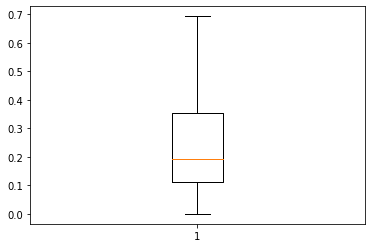

In [59]:
boxplot(df1['Route_score'])

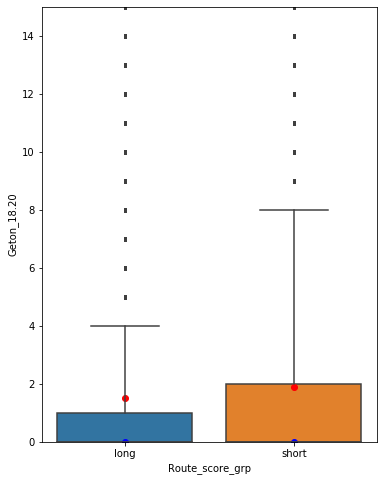

In [57]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='Route_score_grp', y='Geton_18.20', data=df1, fliersize=2, whis=3.0)
plt.scatter(x=['long','short'], y=[route_score_y_mean[0], route_score_y_mean[1]], color='red')
plt.scatter(x=['long','short'], y=[route_score_y_median[0], route_score_y_median[1]], color='blue')
plt.ylim(0, 15)
plt.show()

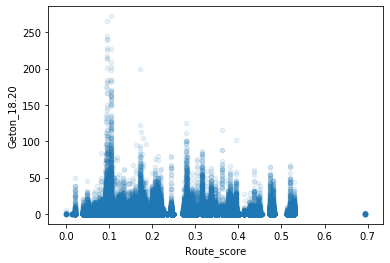

In [60]:
df1.plot.scatter(x='Route_score', y='Geton_18.20', alpha=0.1)

## 버스 배차간격에 따른 승하차인원 차이

In [61]:
df1['Bus_interval'].describe()

count    286706.000000
mean         71.838793
std          31.583186
min           4.000000
25%          51.000000
50%          70.000000
75%          90.000000
max         179.000000
Name: Bus_interval, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed800a6b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed800a6f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed800a6710>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed800ae8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed800aec18>],
 'means': []}

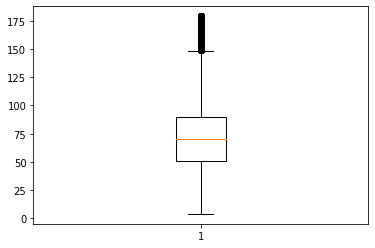

In [63]:
boxplot(df1['Bus_interval'])

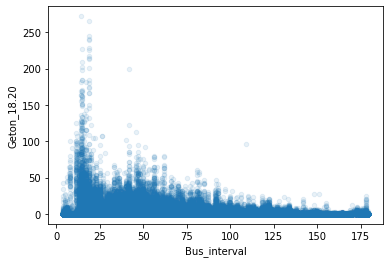

In [64]:
df1.plot.scatter(x='Bus_interval', y='Geton_18.20', alpha=0.1)

## 규칙적인 통근인원과 반응변수 상관관계

In [65]:
df1['Commuter_count'].describe()

count    286706.000000
mean         60.276150
std          86.487569
min           0.000000
25%           6.000000
50%          23.000000
75%          84.000000
max         573.000000
Name: Commuter_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed8011ceb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed801235f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed8011cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed80123c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed80123fd0>],
 'means': []}

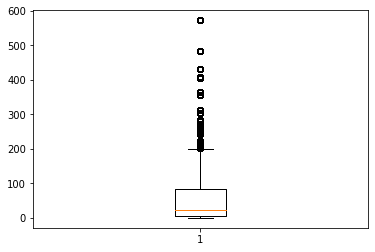

In [66]:
boxplot(df1['Commuter_count'])

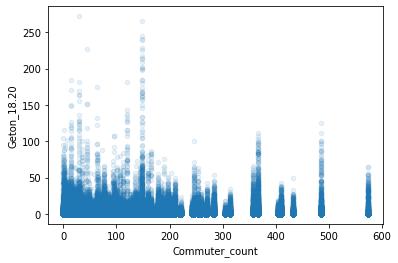

In [68]:
df1.plot.scatter(x='Commuter_count', y='Geton_18.20', alpha=0.1)

## 오전시간 승하차인원과 반응변수 상관관계

In [74]:
df_onoff = df1.loc[:,['Geton_6.9', 'Geton_9.12', 'Getoff_6.9', 'Getoff_9.12', 'Geton_total', 'Getoff_total', 'Geton_18.20']]

In [75]:
df_onoff.corr()

,Geton_6.9,Geton_9.12,Getoff_6.9,Getoff_9.12,Geton_total,Getoff_total,Geton_18.20
Geton_6.9,1.000000,0.619119,0.263855,0.197690,0.891899,0.250524,0.471802
Geton_9.12,0.619119,1.000000,0.297400,0.428801,0.907330,0.416089,0.625573
Getoff_6.9,0.263855,0.297400,1.000000,0.605605,0.312524,0.856233,0.337618
Getoff_9.12,0.197690,0.428801,0.605605,1.000000,0.352772,0.929623,0.365321
Geton_total,0.891899,0.907330,0.312524,0.352772,1.000000,0.373737,0.612838
Getoff_total,0.250524,0.416089,0.856233,0.929623,0.373737,1.000000,0.393505
Geton_18.20,0.471802,0.625573,0.337618,0.365321,0.612838,0.393505,1.000000


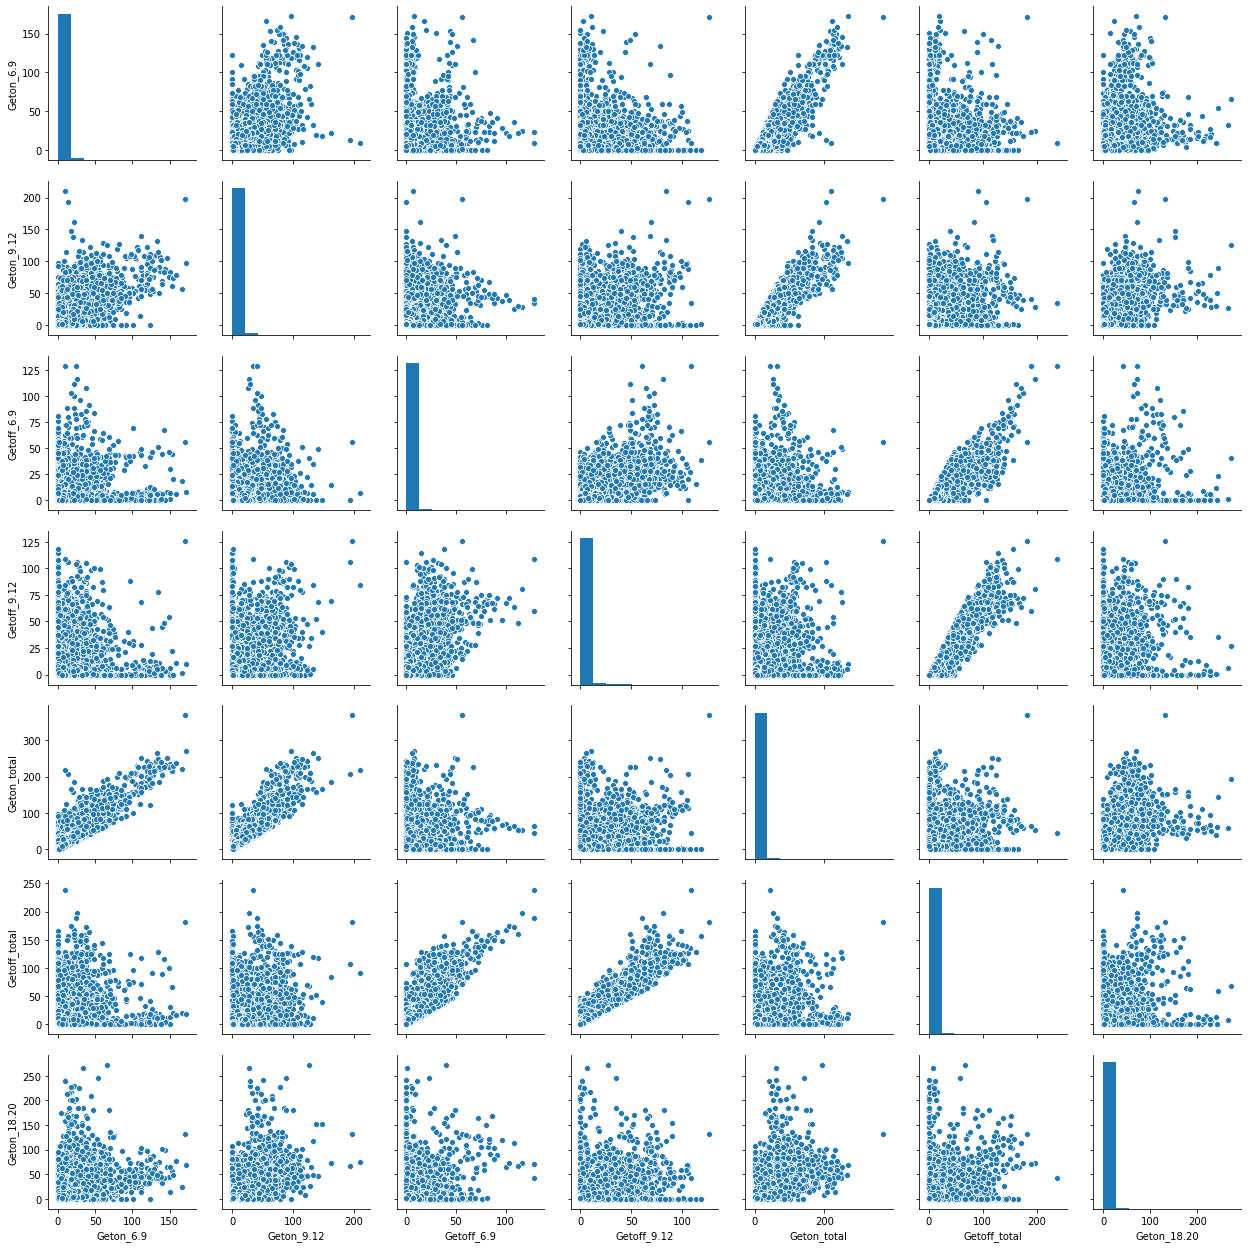

In [77]:
sns.pairplot(df_onoff)

## 승객유형과 반응변수 상관관계

In [81]:
df_type = df1.loc[:,['Type_general_geton', 'Type_others_geton', 'Type_general_getoff', 'Type_others_getoff', 'Geton_18.20']]

In [82]:
df_type.corr()

,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18.20
Type_general_geton,1.000000,0.595942,0.314810,0.276667,0.610101
Type_others_geton,0.595942,1.000000,0.250299,0.403959,0.434638
Type_general_getoff,0.314810,0.250299,1.000000,0.538952,0.374550
Type_others_getoff,0.276667,0.403959,0.538952,1.000000,0.282905
Geton_18.20,0.610101,0.434638,0.374550,0.282905,1.000000


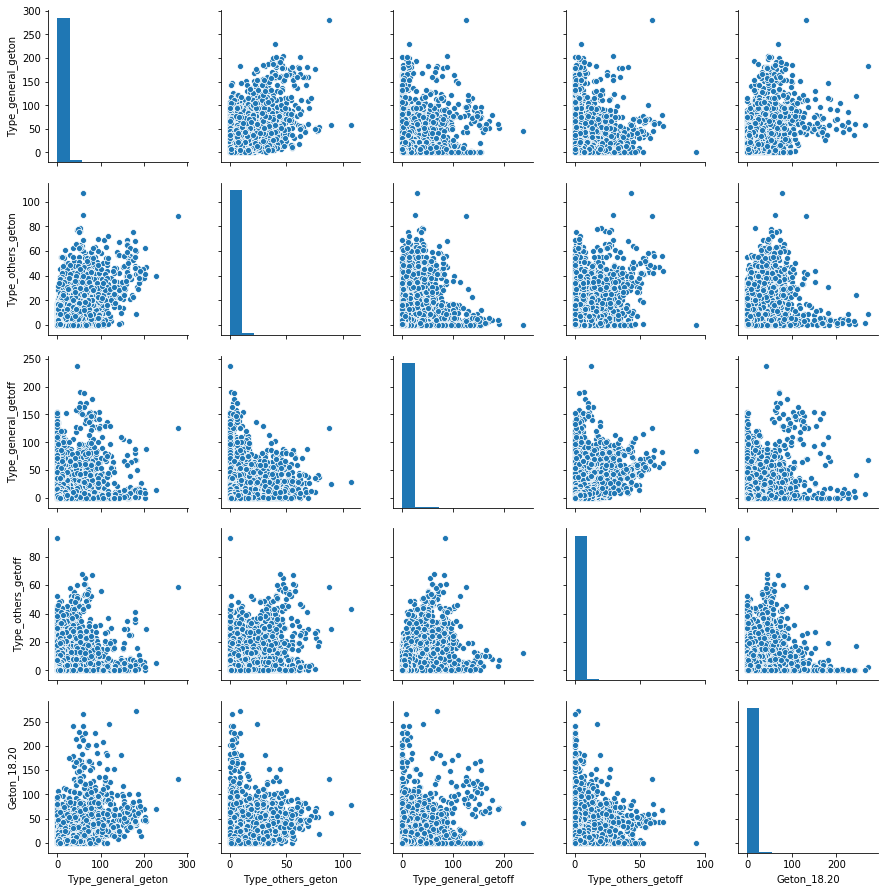

In [83]:
sns.pairplot(df_type)